<a href="https://colab.research.google.com/github/ayushii2811/Shack-Labs-Assignment-/blob/main/House_prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
# from pandas_profiling import ProfileReport 
 
#Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import xgboost as xgb 

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Imputer
from sklearn.impute import SimpleImputer

%matplotlib inline

# Part 1

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/shack_labs/part1.xlsx')

In [ ]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
df.shape

(414, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
#Checking if there are any null values in any of the columns
names = []
for x in df.isnull().sum().iteritems():
    print(x[0], " ", x[1])

Transaction date   0
House Age   0
Distance from nearest Metro station (km)   0
Number of convenience stores   0
latitude   0
longitude   0
Number of bedrooms   0
House size (sqft)   0
House price of unit area   0


Thus there are no missing values in the data and we can proceed for further analysis without any imputation

In [ ]:
# Correlation matrix between each of the features with one another
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [ ]:
# Defining input and output variables as X and y respectively
X = df.drop('House price of unit area', axis = 1)
y = df['House price of unit area']

### Exploratory Data Analysis

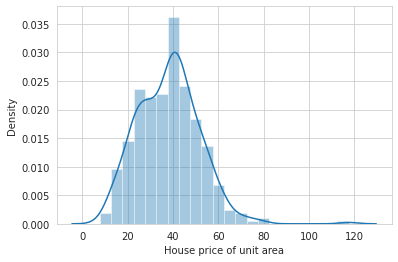

In [ ]:
#Distribution of target labels
x = df['House price of unit area']
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

Correlation matrix plot

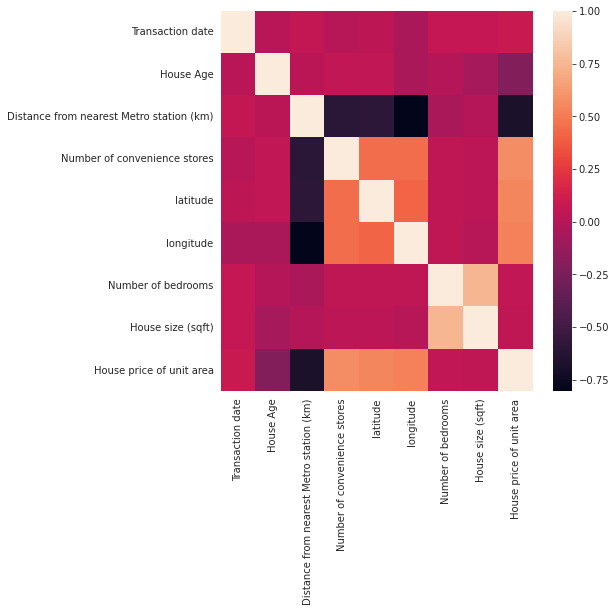

In [ ]:
# Plotting the correlations in data set 
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

We observe positive correlation of latitude, longitude, size, number of convenience stores and bedrooms with house price and negative correlation with transaction date and house age. Indicating older houses have negative impact on prices. Both of these seem logical and the correlations do no look suspicious.

<Figure size 720x720 with 0 Axes>

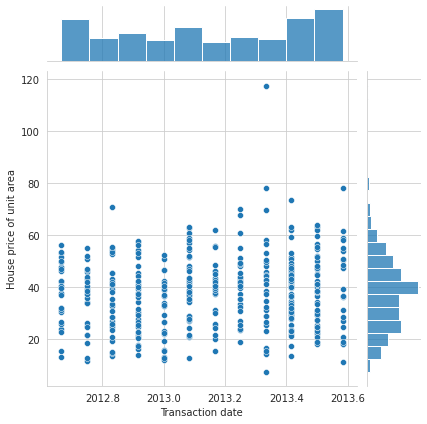

<Figure size 720x720 with 0 Axes>

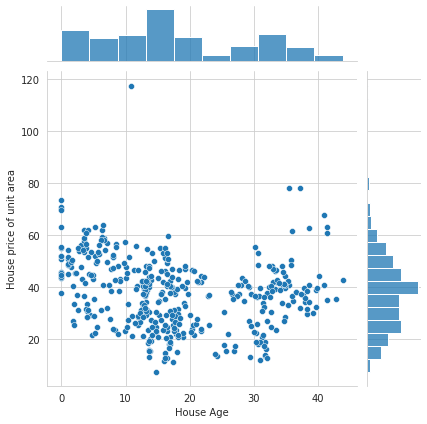

<Figure size 720x720 with 0 Axes>

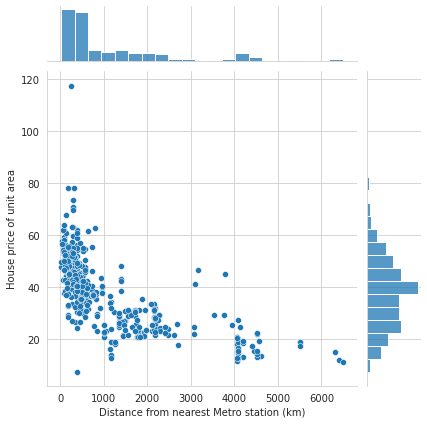

<Figure size 720x720 with 0 Axes>

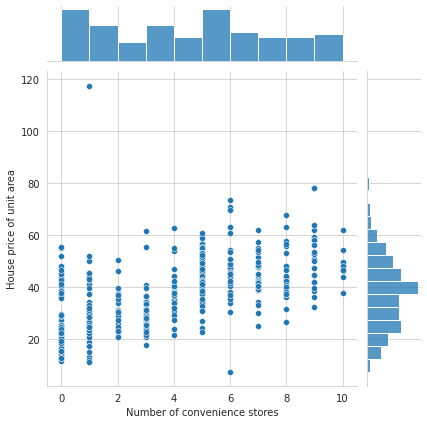

<Figure size 720x720 with 0 Axes>

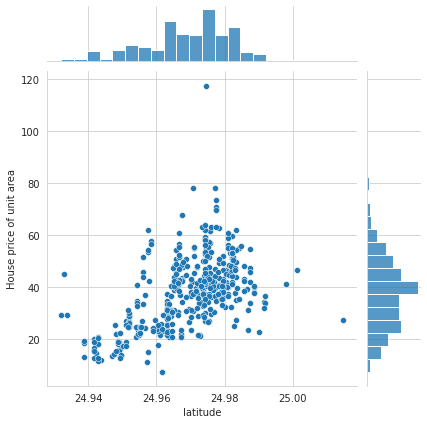

<Figure size 720x720 with 0 Axes>

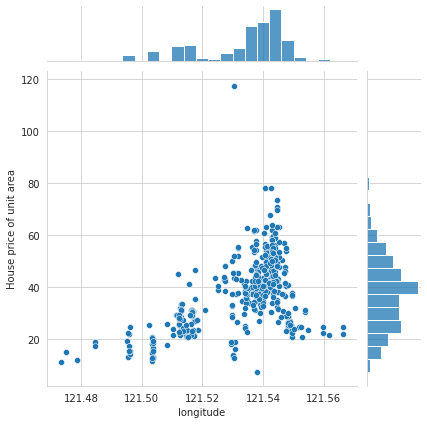

<Figure size 720x720 with 0 Axes>

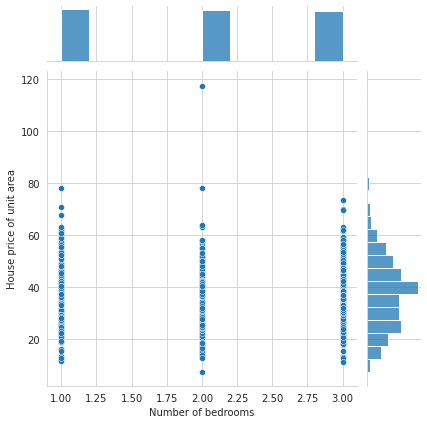

<Figure size 720x720 with 0 Axes>

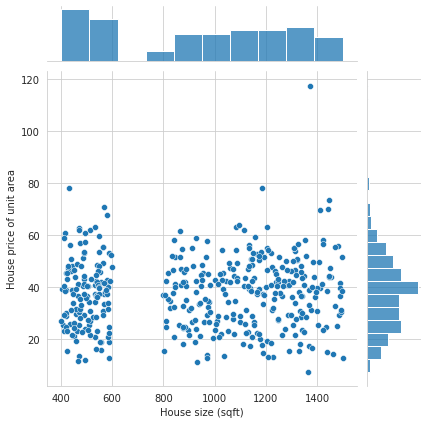

In [ ]:
for features in list(X.columns):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = df[features]
    sns.jointplot(x=x, y=y, data=df)

In [ ]:
# Checking if any row is duplicated 
df.duplicated().sum()

0

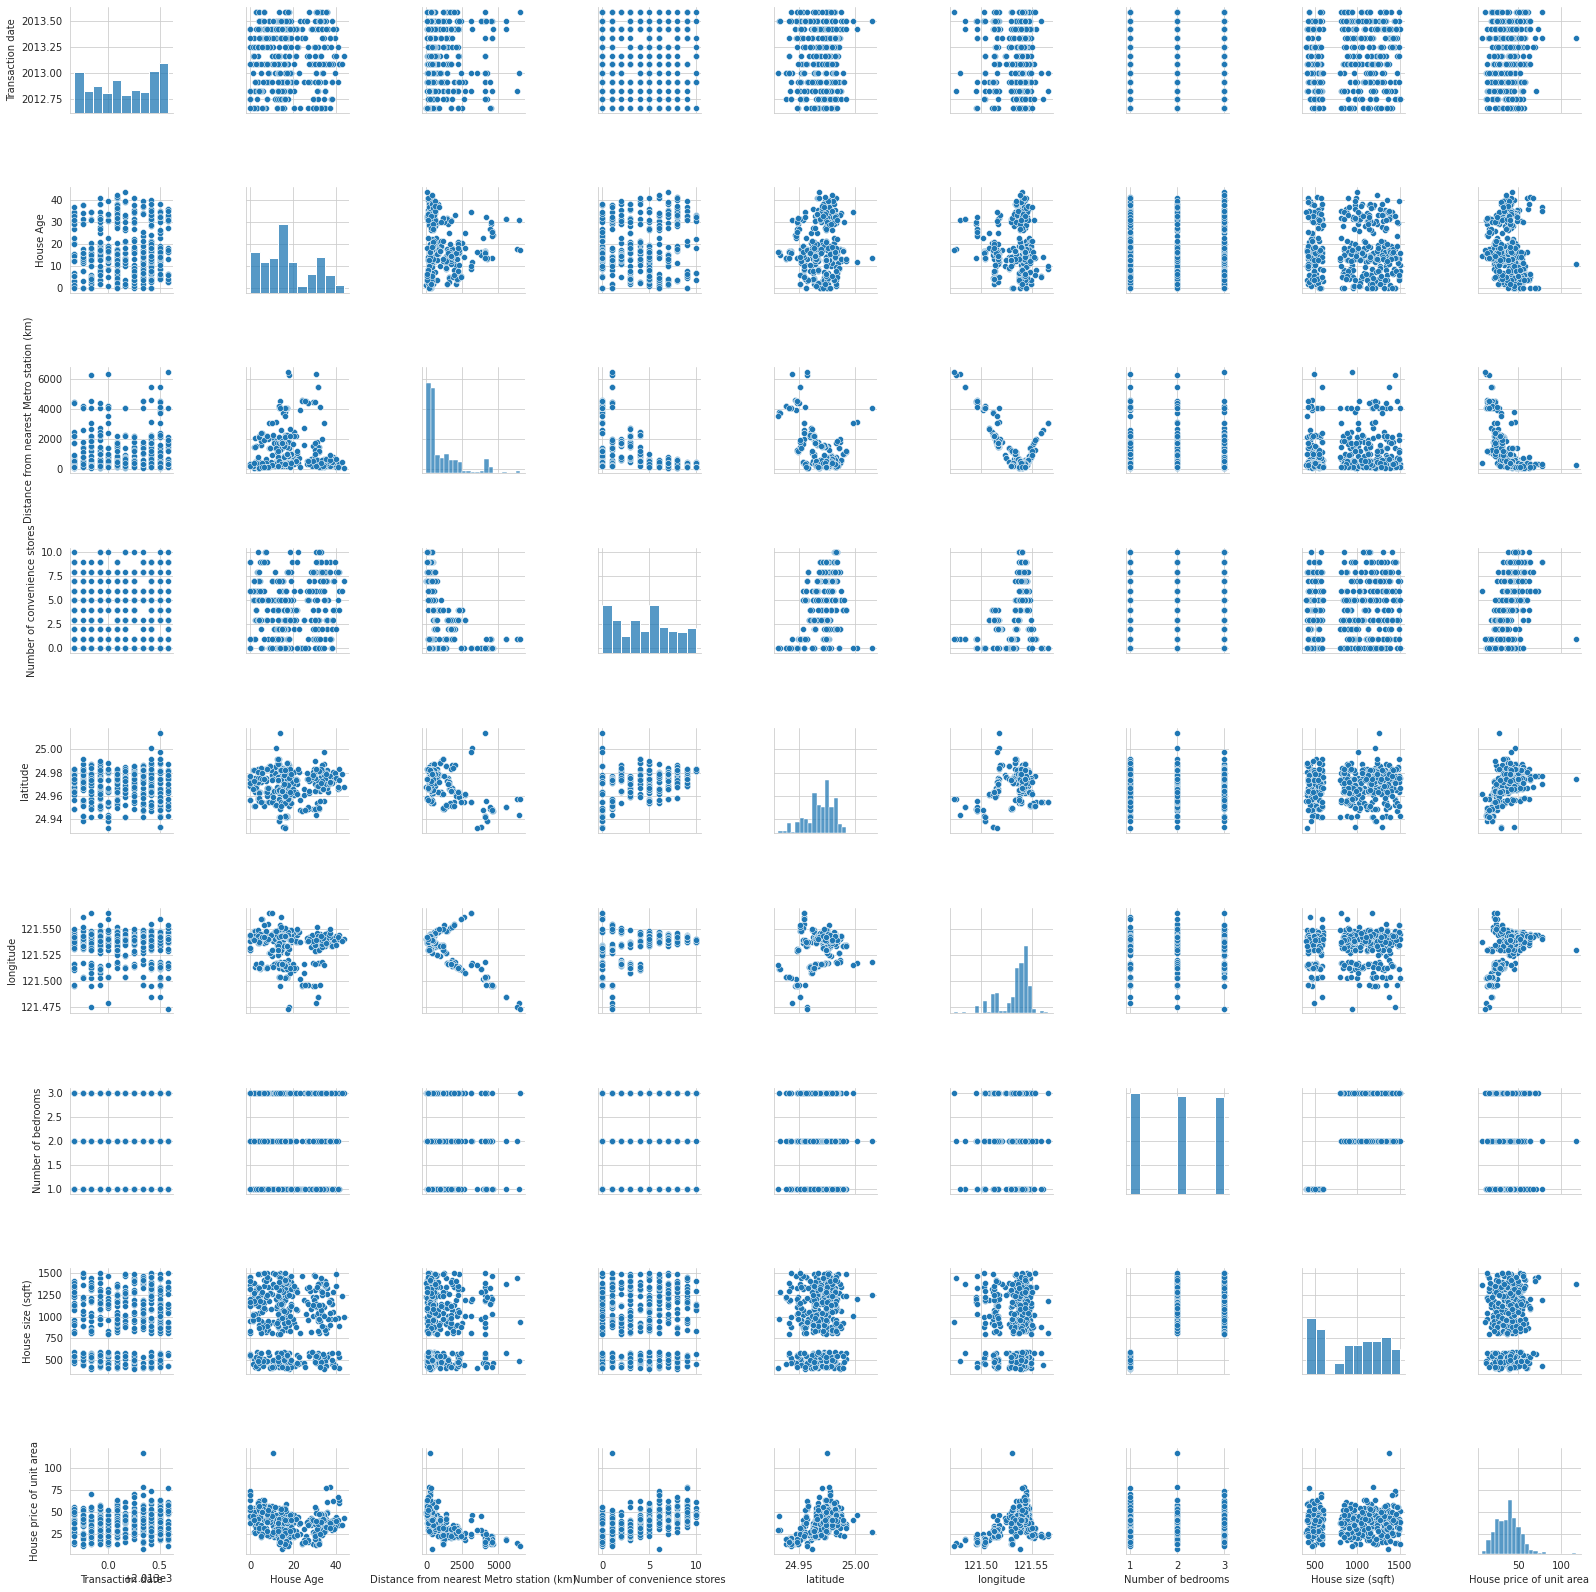

In [ ]:
sns.pairplot(df)

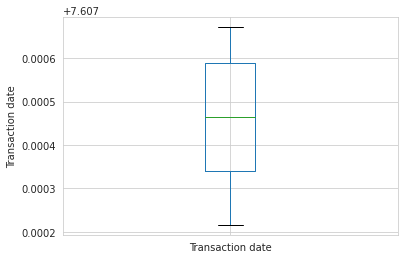

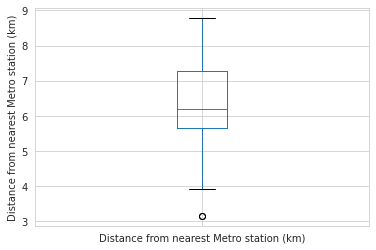

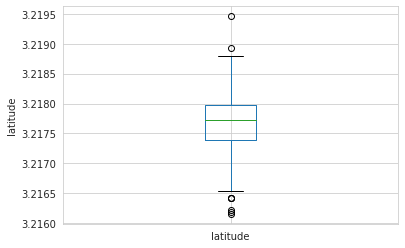

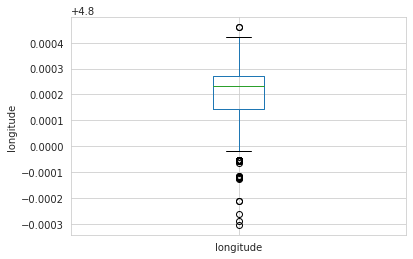

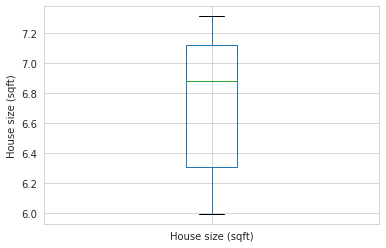

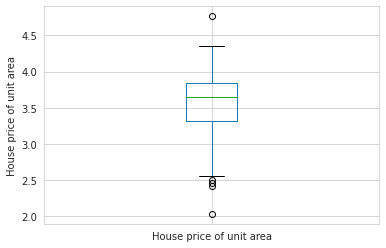

In [ ]:
# Outlier Detection
contf = ['Transaction date', 'House Age', 'Distance from nearest Metro station (km)', 'latitude', 'longitude', 'House size (sqft)', 'House price of unit area']

for i in contf:
  data = df.copy()
  if 0 in data[i].unique():
    pass
  else:
    data[i] = np.log(data[i])
    data.boxplot(column = i)
    plt.ylabel(i)
    plt.show()

In [ ]:
# Identifying categorical and numerical input features
df.dtypes

# We observe all features are numerical

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

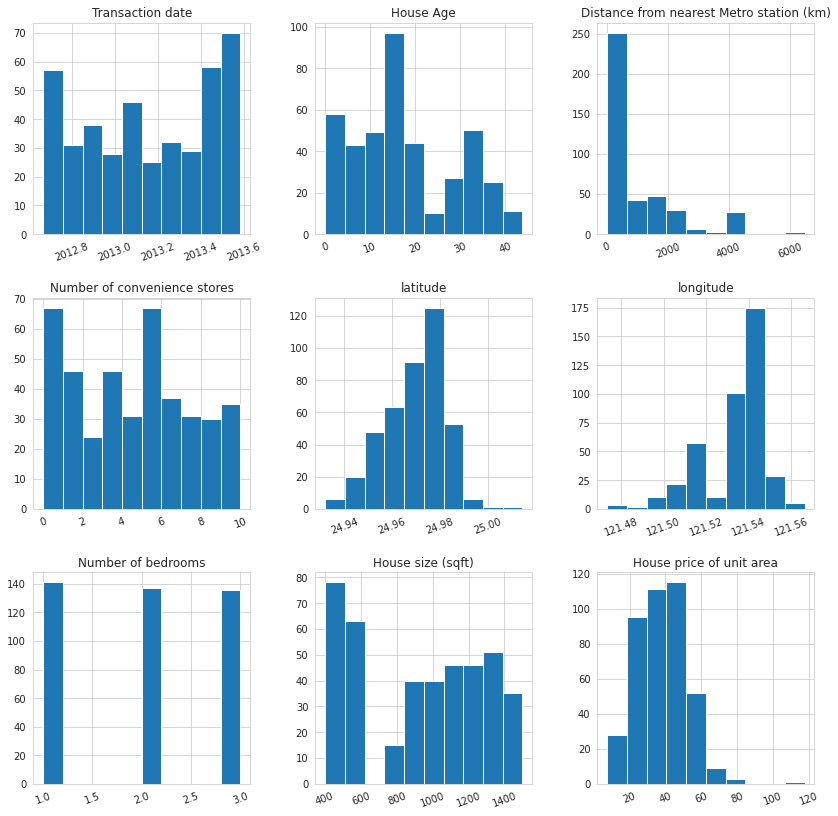

In [ ]:
df.hist(figsize=(14,14), xrot=20)
plt.show()

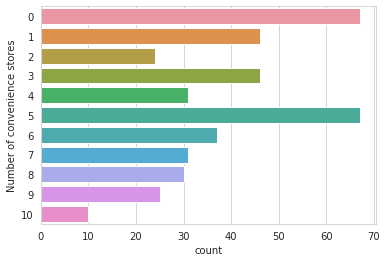

In [ ]:
sns.countplot(y=df['Number of convenience stores'], data=df)
plt.show()

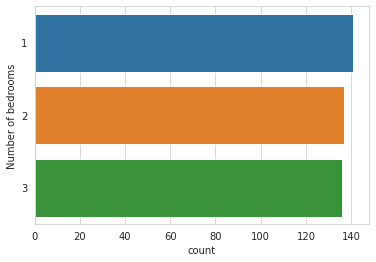

In [ ]:
sns.countplot(y=df['Number of bedrooms'], data=df)
plt.show()

### Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

In [ ]:
# Linear Regression Model
import sklearn.linear_model
from sklearn.metrics import mean_squared_error

lg = sklearn.linear_model.LinearRegression()
lg.fit(X_train, y_train)

lg_rmse = mean_squared_error(y_test, lg.predict(X_test), squared=False)
lg_rmse

7.713344204045181

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, random_state = 0)
rf.fit(X_train, y_train)

rf_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
rf_rmse

6.0548225552859956

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train, y_train)

dt_rmse = mean_squared_error(y_test, dt.predict(X_test), squared=False)
dt_rmse

8.632890477098128

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

xgb_rmse = mean_squared_error(y_test, xgb.predict(X_test), squared=False)
xgb_rmse

[17:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


6.358332723793499

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=4)
cb.fit(X_train, y_train)

cb_rmse = mean_squared_error(y_test, cb.predict(X_test), squared=False)
cb_rmse

0:	learn: 13.3563928	total: 46.7ms	remaining: 23.3s
1:	learn: 12.7164395	total: 48.2ms	remaining: 12s
2:	learn: 12.1692612	total: 49ms	remaining: 8.12s
3:	learn: 11.6868675	total: 49.9ms	remaining: 6.19s
4:	learn: 11.1976683	total: 52.7ms	remaining: 5.21s
5:	learn: 10.8495197	total: 53.7ms	remaining: 4.42s
6:	learn: 10.4325139	total: 54.9ms	remaining: 3.87s
7:	learn: 10.0782019	total: 56.3ms	remaining: 3.46s
8:	learn: 9.7147792	total: 58.1ms	remaining: 3.17s
9:	learn: 9.4778923	total: 59.8ms	remaining: 2.93s
10:	learn: 9.2486542	total: 61.3ms	remaining: 2.73s
11:	learn: 9.0177528	total: 63.1ms	remaining: 2.57s
12:	learn: 8.8106106	total: 66.9ms	remaining: 2.51s
13:	learn: 8.6374278	total: 67.8ms	remaining: 2.35s
14:	learn: 8.4583123	total: 68.9ms	remaining: 2.23s
15:	learn: 8.3535476	total: 69.5ms	remaining: 2.1s
16:	learn: 8.2062293	total: 70.1ms	remaining: 1.99s
17:	learn: 8.0858004	total: 70.8ms	remaining: 1.9s
18:	learn: 7.9896753	total: 71.7ms	remaining: 1.81s
19:	learn: 7.8719834

6.7480822385138906

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1000, epsilon=1)
svr.fit(X_train, y_train)

svr_rmse = mean_squared_error(y_test, svr.predict(X_test), squared=False)
svr_rmse

7.502522529649644

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 10, weights = "distance")
knn.fit(X_train, y_train)

knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
knn_rmse

8.022639252769475

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, solver="cholesky")
ridge.fit(X_train, y_train)

ridge = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
ridge

7.724934759242471

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
lasso

7.629443375381609

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
poly_lr_rmse = mean_squared_error(y_test, lin_reg.predict(X_test_poly), squared=False)
poly_lr_rmse

6.645089289626679

In [ ]:
#Gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

gbr_rmse = mean_squared_error(y_test, gbr.predict(X_test), squared=False)
gbr_rmse

6.51048312431553

### Tuning the best 3 models

Selecting the models that gave the best scores and tuning their hyperparameters to improve performance using GridSearchCV.
1. Random Forest Regressor - 6.05
2. XGBoost Regressor - 6.35
3. Catboost Regressor - 6.74
4. Gradient Boosting Regressor - 6.48

Tuning Random Forest

In [ ]:
# Set parameters for Grid Search
param_grid =  {'n_estimators':[3, 10, 30, 100, 200, 300, 400, 500, 600],
               'max_features':[2, 3, 4, 6, 8]  #0.1, 0.3, 0.6, 
              }
# Initialise the random forest model 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
grid_search = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True)

# Tuned_RandForest.fit(X_train, y_train)
grid_search.fit(X_train, y_train)


print('Random Forest Regressor')

Random Forest Regressor


In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 200}

In [ ]:
Tuned_RandForest = grid_search.best_estimator_
Tuned_RandForest.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=200, n_jobs=-1,
                      random_state=0)

In [ ]:
mean_squared_error(y_test, Tuned_RandForest.predict(X_test), squared=False)

5.956703501770083

Tuning XGB Regressor

In [ ]:
# Set paramters for Grid Search
param_grid =  {'booster':['gbtree','gblinear'],
               'n_estimators':[3, 10, 30, 100, 200, 300, 400, 500, 600],
               'max_depth':[2, 3, 4, 6, 8],
               'eta':[0.01,0.1,0.3,1]
              }
# Initialise the xgb model 
xgbr = XGBRegressor(subsample=0.7)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True)

# Tuned_RandForest.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
    
print('XGB Regressor')

[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
grid_search.best_params_

{'booster': 'gbtree', 'eta': 0.01, 'max_depth': 3, 'n_estimators': 30}

In [ ]:
Tuned_XGB = grid_search.best_estimator_
Tuned_XGB.fit(X_train, y_train)

[17:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.01, n_estimators=30, subsample=0.7)

In [ ]:
mean_squared_error(y_test, Tuned_XGB.predict(X_test), squared=False)

6.05143962737964

Parameter tuning for Catboost

In [ ]:
# Set paramters for Grid Search
param_grid =  {'depth':[2, 3, 4, 6, 8],
               'learning_rate':[0.01,0.1,0.3,1],
               'l2_leaf_reg':[0.1,0.3,1,3, 10],
               #'n_estimators' : [10, 50, 100, 500],
               'subsample' : [0.5, 0.7, 1.0]
              }
# Initialise the xgb model 
cbr = CatBoostRegressor(iterations=500)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
grid_search = GridSearchCV(estimator=cbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print('Catboost Regressor')

Streaming output truncated to the last 5000 lines.
1:	learn: 8.9092397	total: 7.33ms	remaining: 1.83s
2:	learn: 7.9855238	total: 11.1ms	remaining: 1.84s
3:	learn: 7.1909098	total: 15ms	remaining: 1.86s
4:	learn: 6.6136349	total: 18.8ms	remaining: 1.86s
5:	learn: 6.0522026	total: 22.4ms	remaining: 1.85s
6:	learn: 5.5224176	total: 26.2ms	remaining: 1.85s
7:	learn: 5.3519541	total: 31.6ms	remaining: 1.94s
8:	learn: 4.9795813	total: 38.4ms	remaining: 2.1s
9:	learn: 4.6607310	total: 43.9ms	remaining: 2.15s
10:	learn: 4.3616226	total: 47.8ms	remaining: 2.13s
11:	learn: 4.0637059	total: 51.5ms	remaining: 2.09s
12:	learn: 4.0203665	total: 55.5ms	remaining: 2.08s
13:	learn: 3.9914992	total: 59.5ms	remaining: 2.06s
14:	learn: 3.9715837	total: 63.3ms	remaining: 2.05s
15:	learn: 3.9410638	total: 67.1ms	remaining: 2.03s
16:	learn: 3.8664980	total: 70.8ms	remaining: 2.01s
17:	learn: 3.5833445	total: 75.5ms	remaining: 2.02s
18:	learn: 3.5583239	total: 79.4ms	remaining: 2.01s
19:	learn: 3.5328480	tota

In [ ]:
grid_search.best_params_

{'depth': 6, 'l2_leaf_reg': 0.3, 'learning_rate': 0.01, 'subsample': 1.0}

In [ ]:
Tuned_cb = grid_search.best_estimator_
Tuned_cb.fit(X_train, y_train)

0:	learn: 14.0939627	total: 1.52ms	remaining: 758ms
1:	learn: 14.0064908	total: 3.06ms	remaining: 763ms
2:	learn: 13.9231969	total: 4.66ms	remaining: 771ms
3:	learn: 13.8418987	total: 5.38ms	remaining: 667ms
4:	learn: 13.7594954	total: 7.12ms	remaining: 705ms
5:	learn: 13.6756615	total: 8.75ms	remaining: 720ms
6:	learn: 13.5870366	total: 10.4ms	remaining: 732ms
7:	learn: 13.4977791	total: 12ms	remaining: 736ms
8:	learn: 13.4119625	total: 13.5ms	remaining: 739ms
9:	learn: 13.3300490	total: 15.2ms	remaining: 745ms
10:	learn: 13.2430501	total: 16.9ms	remaining: 752ms
11:	learn: 13.1657331	total: 18.5ms	remaining: 751ms
12:	learn: 13.0955552	total: 20ms	remaining: 751ms
13:	learn: 13.0110991	total: 21.7ms	remaining: 752ms
14:	learn: 12.9233017	total: 23.4ms	remaining: 755ms
15:	learn: 12.8399042	total: 25ms	remaining: 757ms
16:	learn: 12.7612131	total: 26.6ms	remaining: 756ms
17:	learn: 12.6879946	total: 28.2ms	remaining: 756ms
18:	learn: 12.6143605	total: 29.9ms	remaining: 756ms
19:	learn

In [ ]:
mean_squared_error(y_test, Tuned_cb.predict(X_test), squared=False)

6.346467601195651

Parameter Tuning for Gradient Boosting Regressor

In [ ]:
# Set paramters for Grid Search
param_grid =  {'max_depth':[2, 3, 4, 6, 8],
               'learning_rate':[0.01,0.1,1],
               'n_estimators' : [10, 50, 100, 500],
               'subsample' : [0.5, 0.7, 1.0]
              }
# Initialise the xgb model 
gbrg = GradientBoostingRegressor()

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
grid_search = GridSearchCV(estimator=gbrg, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print('Gradient Boosting Regressor')

Gradient Boosting Regressor


In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 1.0}

In [ ]:
Tuned_gbr = grid_search.best_estimator_
Tuned_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=50)

In [ ]:
mean_squared_error(y_test, Tuned_gbr.predict(X_test), squared=False)

6.290232594586938

### Ensembling

Averaging

In [ ]:
a = pd.DataFrame(y_test)
a['cb'] = Tuned_cb.predict(X_test)
a['xgb'] = Tuned_XGB.predict(X_test)
a['rf'] = Tuned_RandForest.predict(X_test)
a['gbr'] = Tuned_gbr.predict(X_test)
a['pred'] = (a['cb'] + a['xgb'] + a['rf'] + a['gbr'])/4

In [ ]:
mean_squared_error(y_test, a['pred'], squared=False)

5.96673244596332

Plotting predicted and actual values to evaluate performance

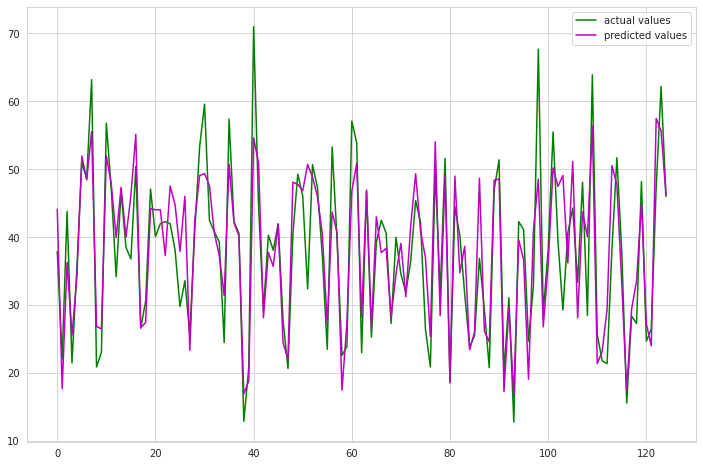

In [ ]:
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],a['pred'], c='m',label="predicted values")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print('R score is :', r2_score(y_test, a['pred']))

R score is : 0.7570560120184155


In [ ]:
print('cb R score is :', r2_score(y_test, a['cb']))
print('rf R score is :', r2_score(y_test, a['rf']))
print('xgb R score is :', r2_score(y_test, a['xgb']))
print('gbr R score is :', r2_score(y_test, a['gbr']))

cb R score is : 0.72514910045306
rf R score is : 0.7578720110921031
xgb R score is : 0.7501091019459059
gbr R score is : 0.7299983380158599


Stacking Regressor

In [ ]:
estimators = [
  ('cb', CatBoostRegressor(depth=6, l2_leaf_reg = 0.3, learning_rate = 0.01, subsample = 1.0)),
  ('rf', RandomForestRegressor(max_features=2, n_estimators=200, n_jobs=-1,random_state=0)),
  ('gbr', GradientBoostingRegressor(max_depth=2, n_estimators=50,learning_rate = 0.1)),
  ('xgb', XGBRegressor(eta=0.01, n_estimators=30, subsample=0.7, max_depth=3))
]

In [ ]:
from sklearn.ensemble import StackingRegressor

model = StackingRegressor(estimators=estimators)

model.fit(X_train,y_train)

rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
r2 = r2_score(y_test, model.predict(X_test))

print(rmse, r2)

Streaming output truncated to the last 5000 lines.
6:	learn: 12.6399548	total: 10.3ms	remaining: 1.46s
7:	learn: 12.5521232	total: 11.7ms	remaining: 1.45s
8:	learn: 12.4706029	total: 13.6ms	remaining: 1.5s
9:	learn: 12.3906320	total: 15.1ms	remaining: 1.49s
10:	learn: 12.3061929	total: 16.6ms	remaining: 1.49s
11:	learn: 12.2275962	total: 18.2ms	remaining: 1.49s
12:	learn: 12.1497001	total: 19.6ms	remaining: 1.49s
13:	learn: 12.0643251	total: 21ms	remaining: 1.48s
14:	learn: 11.9814117	total: 22.5ms	remaining: 1.47s
15:	learn: 11.9021147	total: 24.3ms	remaining: 1.5s
16:	learn: 11.8272658	total: 25.8ms	remaining: 1.49s
17:	learn: 11.7569487	total: 27.2ms	remaining: 1.49s
18:	learn: 11.6767499	total: 28.7ms	remaining: 1.48s
19:	learn: 11.6081639	total: 30.2ms	remaining: 1.48s
20:	learn: 11.5376641	total: 31.8ms	remaining: 1.48s
21:	learn: 11.4654869	total: 33.3ms	remaining: 1.48s
22:	learn: 11.3979494	total: 34.7ms	remaining: 1.48s
23:	learn: 11.3230309	total: 36.1ms	remaining: 1.47s
24:

Since Averaging ensemble method gives better performance than stacking and individual models, we go ahead with that to make the final predictions. In addition to this, if there are constraints on space and computation power, Random Forest alone can also be used since it's performance is at par with the ensemble.